In [1]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
house_df = pd.read_csv("kc_house_data.csv") 

In [4]:
house_df.shape

(21613, 21)

In [5]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### EDA and few initial observation of feature set and trying to remove which is not useful

In [6]:
#dropping the id column
house_df=house_df.drop(['id'],axis=1)

In [7]:
house_df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
#the waterfront has very less of type 1 hence this feature can be removed.

In [8]:
house_df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [9]:
#missing value check
house_df = house_df.replace(r'\s+', np.nan, regex=True)
house_df[house_df.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [10]:
#converting date column into int
house_df['date']=house_df['date'].str[0:8].astype(int)
house_df.dtypes

date               int32
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
print(house_df.describe())

               date         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   2.014390e+07  5.400881e+05      3.370842      2.114757   2079.899736   
std    4.436582e+03  3.671272e+05      0.930062      0.770163    918.440897   
min    2.014050e+07  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.014072e+07  3.219500e+05      3.000000      1.750000   1427.000000   
50%    2.014102e+07  4.500000e+05      3.000000      2.250000   1910.000000   
75%    2.015022e+07  6.450000e+05      4.000000      2.500000   2550.000000   
max    2.015053e+07  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

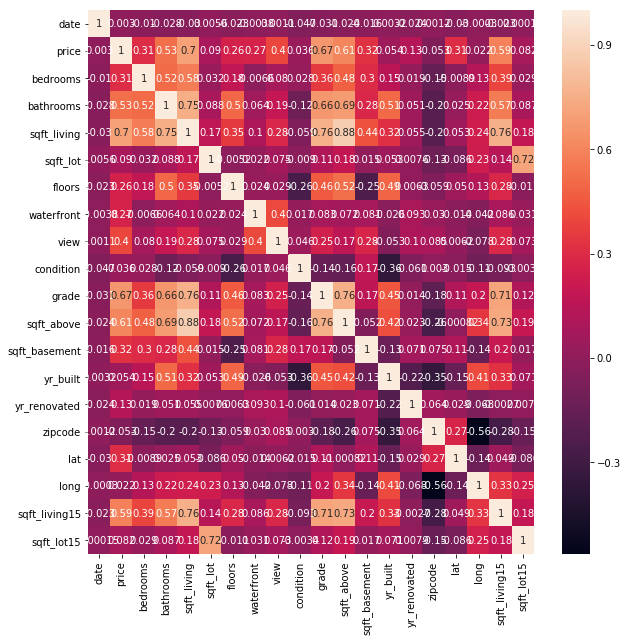

In [12]:
corrmat = house_df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, annot=True)

 df = house_df.corr(method = 'pearson')
df.iloc[:,1:2]

###### features which can be picked up from pearson correlation are bathrooms,sqft_living,grade,sqft_above and sqft_living15

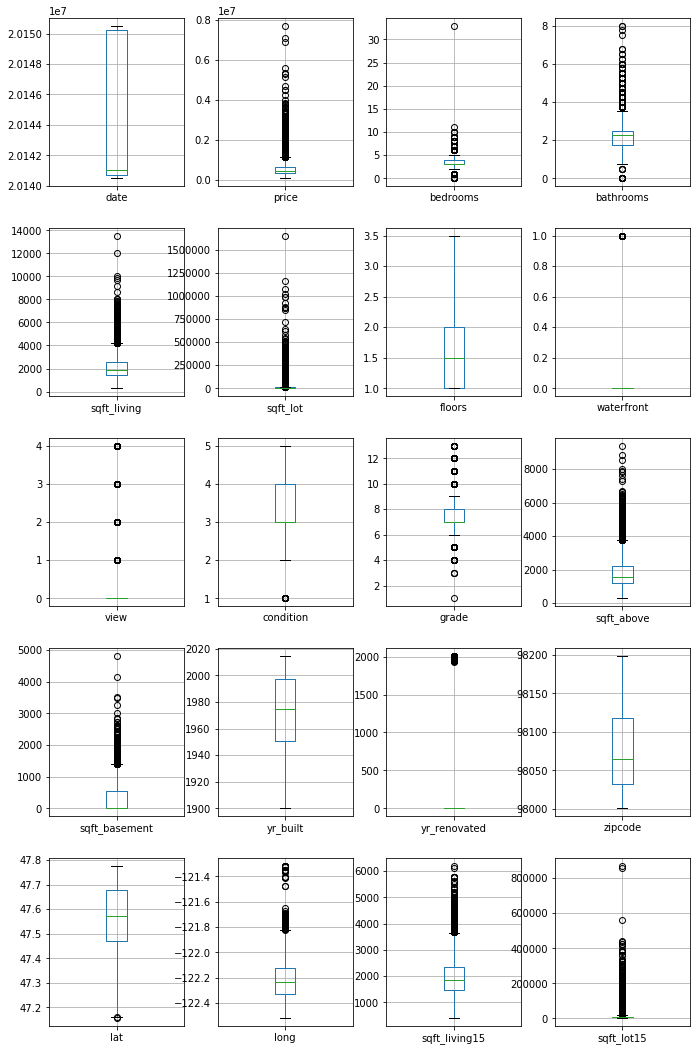

In [14]:
#outlier analysis
fig, axes = plt.subplots(5,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(house_df.columns.values)[:]):
    a = house_df.boxplot(el,ax=axes.flatten()[i])

In [15]:
q1 = house_df.quantile(0.25)
q3 = house_df.quantile(0.75)
iqr=q3-q1
cap1 = q1-1.5*iqr
cap2 = q3+1.5*iqr
house_df = house_df[(house_df>=cap1) & (house_df<=cap2)]
house_df = house_df.dropna(axis=0)
    
print(house_df.shape)

(14934, 20)


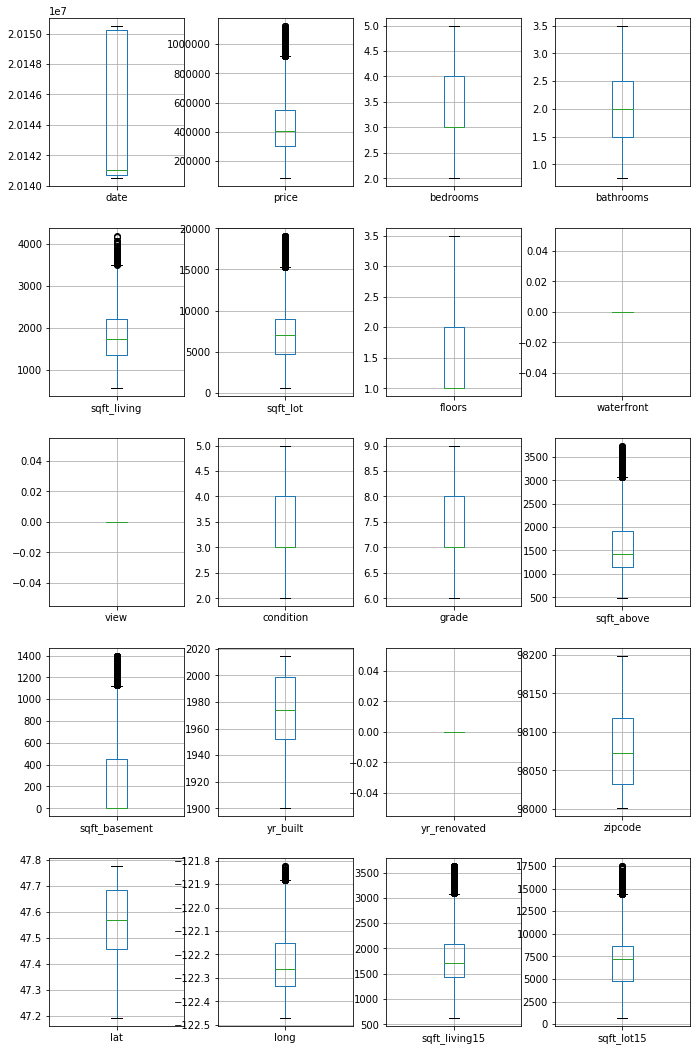

In [16]:
fig, axes = plt.subplots(5,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(house_df.columns.values)[:]):
    a = house_df.boxplot(el,ax=axes.flatten()[i])

In [17]:
import datetime
now = datetime.datetime.now()

In [18]:
#calculating the age of the property
house_df['prop_age'] = now.year - house_df['yr_built']

In [19]:
house_df["waterfront"].value_counts()

0.0    14934
Name: waterfront, dtype: int64

In [20]:
#waterfront has no 1's after removing outliers, Hence removing this feture
#yr_built this feture is used to build an age of property hence removing

house_corr_df = house_df.drop(['yr_built','waterfront'],axis=1)

### Looking into various regression algorithms without doing anything

In [21]:
Y=house_corr_df[['price']]
X=house_corr_df.drop(['price'],axis=1)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled) # Creating dataframe
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled) # Creating dataframe

In [25]:
#linear regression
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train)
print("model training score.........",regression_model.score(x_train_scaled, y_train))
print("model testing score.......",regression_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = regression_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = regression_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.655340936816682
model testing score....... 0.6656080605940495
11264401437.392673
10631289688.913736


In [26]:
#lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=10e5)
lasso_model.fit(x_train_scaled, y_train)
print("model training score.........",lasso_model.score(x_train_scaled, y_train))
print("model testing score.......",lasso_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = lasso_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = lasso_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.6553409368165829
model testing score....... 0.6656080606445565
11264401437.395914
10631289687.307978


In [27]:
#ridge regression
ridge_model =Ridge(alpha=0.01, max_iter=10e5)
ridge_model.fit(x_train_scaled, y_train)
print("model training score.........",ridge_model.score(x_train_scaled, y_train))
print("model testing score.......",ridge_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = ridge_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = ridge_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.6553409368162297
model testing score....... 0.6656080514423658
11264401437.407457
10631289979.872309


In [28]:
#random forest regression
randomForest_model = RandomForestRegressor(n_estimators = 100,random_state=10)
randomForest_model.fit(x_train_scaled, y_train)

print("model training score.........",randomForest_model.score(x_train_scaled, y_train))
print("model testing score.......",randomForest_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = randomForest_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = randomForest_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.9817365597862258
model testing score....... 0.867480822730601
596899209.0202266
4213169029.7030635


### among the regression algorithms Random forest regressor gave the best result 

### feature selection techniques
#1. VIF
#2. Forward feature selection
#3. EXtra Tree classifiers

### idea is to choose each feature selection technique and apply random forest regression on reduced feature

### VIF

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor


class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [32]:
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(X, Y)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping sqft_living with vif=inf
Dropping zipcode with vif=5168314.54699402
Dropping date with vif=1516015.773122257
Dropping lat with vif=118558.67192225157
Dropping long with vif=207.62319990341624
Dropping grade with vif=81.6241337860697
Dropping sqft_living15 with vif=30.344390764746347
Dropping bedrooms with vif=30.009744197172765
Dropping sqft_lot15 with vif=28.29275110833948
Dropping bathrooms with vif=27.515611587934334
Dropping condition with vif=22.746049782241144
Dropping sqft_above with vif=13.664376008826537


,sqft_lot,floors,view,sqft_basement,yr_renovated,prop_age
0,5650.0,1.0,0.0,0.0,0.0,64.0
1,10000.0,1.0,0.0,0.0,0.0,86.0
2,5000.0,1.0,0.0,910.0,0.0,54.0
3,8080.0,1.0,0.0,0.0,0.0,32.0
4,6819.0,2.0,0.0,0.0,0.0,24.0


### features selected by VIF are sqft_lot,floors,view,sqft_basement,yr_renovated,prop_age

### running the random forest regression on the above feature selection 

In [40]:
vif_df = house_corr_df[['sqft_lot','floors','view','sqft_basement','yr_renovated','prop_age']]
vif_df.head()
X1 = vif_df
Y1 = house_corr_df['price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [42]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled) # Creating dataframe
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled) # Creating dataframe

In [43]:
randomForest_model = RandomForestRegressor(n_estimators = 100,random_state=10)
randomForest_model.fit(x_train_scaled, y_train)

print("model training score.........",randomForest_model.score(x_train_scaled, y_train))
print("model testing score.......",randomForest_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = randomForest_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = randomForest_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.8694503177015227
model testing score....... 0.17754888417186243
4266720901.959742
26148106568.814266


### 2.Forward feature selection

In [33]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
sfs1 = sfs(regression_model, k_features=7, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scaled.values, y_train.values)
sfs1.get_metric_dict()

{1: {'avg_score': 0.27562610209853033,
  'ci_bound': 0.013989394338670068,
  'cv_scores': array([0.27180738, 0.28492638, 0.26077964, 0.29096186, 0.26965525]),
  'feature_idx': (8,),
  'feature_names': ('8',),
  'std_dev': 0.010884224061190004,
  'std_err': 0.005442112030595001},
 2: {'avg_score': 0.48649192944184527,
  'ci_bound': 0.015166403731051376,
  'cv_scores': array([0.48459204, 0.47529766, 0.47374895, 0.49344753, 0.50537346]),
  'feature_idx': (8, 13),
  'feature_names': ('8', '13'),
  'std_dev': 0.011799977355340203,
  'std_err': 0.005899988677670101},
 3: {'avg_score': 0.5631838441690242,
  'ci_bound': 0.012987882067427821,
  'cv_scores': array([0.57314489, 0.55874921, 0.54635077, 0.56412573, 0.57354862]),
  'feature_idx': (3, 8, 13),
  'feature_names': ('3', '8', '13'),
  'std_dev': 0.010105013489500006,
  'std_err': 0.005052506744750003},
 4: {'avg_score': 0.6125867988831608,
  'ci_bound': 0.013404166346106595,
  'cv_scores': array([0.62389897, 0.60617631, 0.60018086, 0.606

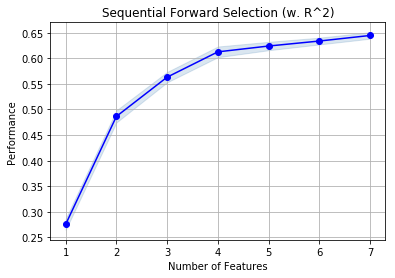

In [35]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [36]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[3, 7, 8, 13, 15, 16, 17]
['sqft_living', 'condition', 'grade', 'lat', 'sqft_living15', 'sqft_lot15', 'prop_age']


### feature selected by fwd selection are sqft_living,condition,grade,lat,sqft_living15,sqft_lot15,prop_age

### running random forest on this reduced feature selection

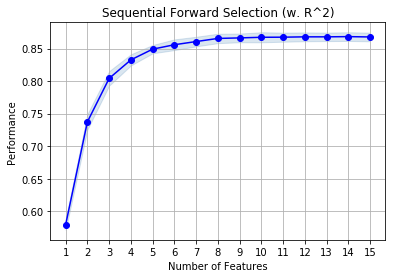

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 17]
['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'prop_age']


In [37]:
sfs1 = sfs(randomForest_model, k_features=15, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scaled.values, y_train.values)
sfs1.get_metric_dict()
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

### 2.feature selection using extra tree classifier method

In [45]:
Y3=house_corr_df[['price']]
X3=house_corr_df.drop(['price'],axis=1)

In [47]:
model = ExtraTreesClassifier(n_estimators=10,random_state = 10)
model.fit(X3, Y3)
print(model.feature_importances_)

importances = model.feature_importances_ #array with importances of each feature

idx = np.arange(0, X3.shape[1]) #create an index array, with the number of features

features_to_keep = idx[importances > np.mean(importances)] #only keep features whose importance is greater than the mean importance
#should be about an array of size 3 (about)
print(features_to_keep.shape)
dataframe = pd.DataFrame(columns=features_to_keep)
for i in features_to_keep:
    print("------------")
    print(i)



[0.09255372 0.03640891 0.04859309 0.08173862 0.08518941 0.01711587
 0.         0.02790561 0.01588765 0.08099043 0.03969462 0.
 0.05924197 0.09121707 0.08213183 0.0816283  0.08278614 0.07691676]
(10,)
------------
0
------------
3
------------
4
------------
9
------------
12
------------
13
------------
14
------------
15
------------
16
------------
17


In [48]:
reduced_df = X3.iloc[:,[0,3,4,9,12,13,14,15,16,17]]
reduced_df.columns

Index(['date', 'sqft_living', 'sqft_lot', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'prop_age'],
      dtype='object')

### running random forest on reduced features of extra tree classifiers

In [65]:

X4=reduced_df
Y4=house_corr_df['price']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.20, random_state=1)

In [67]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled) # Creating dataframe
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled) # Creating dataframe

In [68]:
randomForest_model = RandomForestRegressor(n_estimators = 100,random_state=10)
randomForest_model.fit(x_train_scaled, y_train)

print("model training score.........",randomForest_model.score(x_train_scaled, y_train))
print("model testing score.......",randomForest_model.score(x_test_scaled, y_test))

#train MSE
predictedPrice = randomForest_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = randomForest_model.predict(x_test_scaled)
print(mean_squared_error(predictedPrice, y_test))

model training score......... 0.9802765654576515
model testing score....... 0.853342086859058
644615819.3466133
4662680453.789549


### Feature selection of extra tree classifier gave the best result

### pipeline techniques with parameter tuning

In [53]:
X5 = house_corr_df.drop('price', axis=1)
Y5 = house_corr_df[['price']]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X5, Y5, test_size=validation_size, random_state=seed)

In [54]:
num_folds = 10
seed = 7
scoring = 'r2'

In [55]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('RAND', RandomForestRegressor()))
models.append(('LASS', Lasso()))
models.append(('RID', Ridge()))

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.653929 (0.015762)
KNN: -0.317205 (0.029964)
DEC: -0.733353 (0.016768)
RAND: -0.856199 (0.009444)
LASS: -0.653930 (0.015763)
RID: -0.653926 (0.015759)


In [57]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('DEC', DecisionTreeRegressor())])))
pipelines.append(('ScaledRAND', Pipeline([('Scaler', StandardScaler()), ('RAND', RandomForestRegressor())])))
pipelines.append(('ScaledLASS', Pipeline([('Scaler', StandardScaler()), ('LASS', Lasso())])))
pipelines.append(('ScaledRID', Pipeline([('Scaler', StandardScaler()), ('RID', Ridge())])))

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
scaler.mean_

array([ 2.01439628e+07,  3.26291119e+00,  1.97363355e+00,  1.81330786e+03,
        6.99936419e+03,  1.47580983e+00,  0.00000000e+00,  3.41717586e+00,
        7.38185318e+00,  1.58741148e+03,  2.25896376e+02,  0.00000000e+00,
        9.80791611e+04,  4.75582588e+01, -1.22229310e+02,  1.79653369e+03,
        6.87272671e+03,  4.71818030e+01])

In [60]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.653806 (0.015862)
ScaledKNN: -0.739045 (0.010697)
ScaledCART: -0.734033 (0.015873)
ScaledRAND: -0.855139 (0.011305)
ScaledLASS: -0.653930 (0.015762)
ScaledRID: -0.653930 (0.015763)


In [61]:
param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

In [62]:
# Tune scaled Random Forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [63]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.868658 using {'n_estimators': 100}
-0.854581 (0.010932) with: {'n_estimators': 10}
-0.863218 (0.011236) with: {'n_estimators': 20}
-0.866111 (0.010912) with: {'n_estimators': 30}
-0.867233 (0.010610) with: {'n_estimators': 40}
-0.868033 (0.011063) with: {'n_estimators': 50}
-0.868310 (0.010928) with: {'n_estimators': 60}
-0.868525 (0.010997) with: {'n_estimators': 70}
-0.868541 (0.011043) with: {'n_estimators': 80}
-0.868598 (0.011256) with: {'n_estimators': 90}
-0.868658 (0.011268) with: {'n_estimators': 100}
